In [3]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [7]:
for dataset in combine:
    dataset['GarageType'] = dataset['GarageType'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

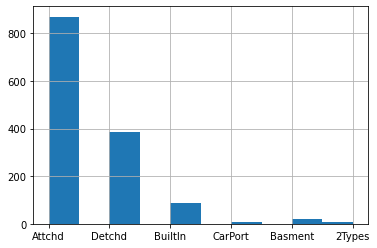

In [14]:


train_df['GarageType'].fillna(train_df['GarageType'].dropna().median(), inplace=True)

TypeError: could not convert string to float: 'Attchd'

#### Выводы из информации про участок

 - LotFrontage не заполнен в 18%, но он не бесполезен. Есть корелляция между ним и ценой дома, правда не очень точная
 - 70% лотов - Inside, скорее всего это квартиры
 - Alley не заполнен почти везде, его нужно исключить
 - Street ни на что не влияет

In [11]:
#информация об участке
lot_land_data = pd.DataFrame()
lot_land_data['Id'] = train_df['Id'].values
lot_land_data['SalePrice'] =  train_df['SalePrice'].values
lot_land_data['LotFrontage'] = train_df['LotFrontage'].values
lot_land_data['LotArea'] = train_df['LotArea'].values
lot_land_data['Street'] = train_df['Street'].values
lot_land_data['Alley'] = train_df['Alley'].values
lot_land_data['LotShape'] = train_df['LotShape'].values
lot_land_data['LandContour'] = train_df['LandContour'].values
lot_land_data['LotConfig'] = train_df['LotConfig'].values
lot_land_data['LandSlope'] = train_df['LandSlope'].values
lot_land_data['Condition1'] = train_df['Condition1'].values
lot_land_data['Condition2'] = train_df['Condition2'].values
lot_land_data.head()

,Id,SalePrice,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Condition1,Condition2
0,1,208500,65.0,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,Norm,Norm
1,2,181500,80.0,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,Feedr,Norm
2,3,223500,68.0,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,Norm,Norm
3,4,140000,60.0,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,Norm,Norm
4,5,250000,84.0,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,Norm,Norm


In [12]:
lot_land_data.isnull().sum()

Id                0
SalePrice         0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Condition1        0
Condition2        0
dtype: int64

In [13]:
lot_land_data.describe(include=['O'])

,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Condition1,Condition2
count,1460,91,1460,1460,1460,1460,1460,1460
unique,2,2,4,4,5,3,9,8
top,Pave,Grvl,Reg,Lvl,Inside,Gtl,Norm,Norm
freq,1454,50,925,1311,1052,1382,1260,1445


In [14]:
lot_land_data.describe()

,Id,SalePrice,LotFrontage,LotArea
count,1460.000000,1460.000000,1201.000000,1460.000000
mean,730.500000,180921.195890,70.049958,10516.828082
std,421.610009,79442.502883,24.284752,9981.264932
min,1.000000,34900.000000,21.000000,1300.000000
25%,365.750000,129975.000000,59.000000,7553.500000
50%,730.500000,163000.000000,69.000000,9478.500000
75%,1095.250000,214000.000000,80.000000,11601.500000
max,1460.000000,755000.000000,313.000000,215245.000000


In [15]:
inside_lots = lot_land_data[lot_land_data.LotConfig=='Inside']
inside_lots.shape

(1052, 12)

In [16]:
#sns.set(rc={'figure.figsize':(10,6)})
#sns.lineplot(x='LotFrontage', y='SalePrice', data=lot_land_data[lot_land_data.SalePrice<500000])

In [30]:
#plt.hist(lot_land_data[lot_land_data.Street=='Pave'].SalePrice)
#plt.hist(lot_land_data[lot_land_data.Street=='Grvl'].SalePrice)

In [ ]:
#более общая информация о самом доме/районе и удобствах
general_data = pd.DataFrame()
general_data['Neighborhood'] = train_df['Neighborhood'].values
general_data['MSSubClass'] = train_df['MSSubClass'].values
general_data['MSZoning'] = train_df['MSZoning'].values
#general_data[''] = train_df[''].values

In [ ]:
#информация о внешних частях дома
outside_data = pd.DataFrame()
outside_data['Id'] = train_df['Id'].values
outside_data['SalePrice'] =  train_df['SalePrice'].values
outside_data['BldgType'] = train_df['BldgType'].values
outside_data['HouseStyle'] = train_df['HouseStyle'].values
outside_data['OverallQual'] = train_df['OverallQual'].values
outside_data['OverallCond'] = train_df['OverallCond'].values
outside_data['YearBuilt'] = train_df['YearBuilt'].values
outside_data['YearRemodAdd'] = train_df['YearRemodAdd'].values
outside_data['RoofStyle'] = train_df['RoofStyle'].values
outside_data['RoofMatl'] = train_df['RoofMatl'].values
outside_data['Exterior1st'] = train_df['Exterior1st'].values
outside_data['Exterior2nd'] = train_df['Exterior2nd'].values
outside_data['MasVnrType'] = train_df['MasVnrType'].values
outside_data['MasVnrArea'] = train_df['MasVnrArea'].values
outside_data['ExterQual'] = train_df['ExterQual'].values
outside_data['ExterCond'] = train_df['ExterCond'].values
outside_data.head()

In [ ]:
#информация о подвале
basement_data = pd.DataFrame()
basement_data['Id'] = train_df['Id'].values
basement_data['SalePrice'] =  train_df['SalePrice'].values
basement_data['Foundation'] = train_df['Foundation']
basement_data['BsmtQual'] = train_df['BsmtQual']
basement_data['BsmtCond'] = train_df['BsmtCond']
basement_data['BsmtExposure'] = train_df['BsmtExposure']
basement_data['BsmtFinType1'] = train_df['BsmtFinType1']
basement_data['BsmtFinSF1'] = train_df['BsmtFinSF1']
basement_data['BsmtFinType2'] = train_df['BsmtFinType2']
basement_data['BsmtFinSF2'] = train_df['BsmtFinSF2']
basement_data['BsmtUnfSF'] = train_df['BsmtUnfSF']
basement_data['TotalBsmtSF'] = train_df['TotalBsmtSF']
basement_data.head()

In [43]:
#информация о внутренних частях дома
inside_data = pd.DataFrame()